In [1]:
from npeb.GLMixture import *

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Circle demo

In [9]:
np.random.seed(1234567891)

n,p = 1000,2

ang = 2*np.pi*np.random.rand(n)
truth = 2*np.array([np.cos(ang), np.sin(ang)]).T

l, u = .5, 1
covs = l + np.random.rand(n,p)*(u-l)
prec = 1/covs
X = truth + covs**(1/2)*np.random.randn(n,p)

L = np.max(np.abs(X))

(XX, YY) = np.meshgrid(np.linspace(-L, L, 50), np.linspace(-L, L, 50))
atoms = np.vstack([XX.flatten(), YY.flatten()]).T

In [11]:
m = GLMixture(prec_type='diagonal')
 
## Compute the NPMLE 
m.fit(X, prec)

## Denoised estimates based on empirical prior
gmleb = m.posterior_mean(X, prec)

Selecting all data points as atoms: done.
Computing kernel matrix: done.
Solving for discretized NPMLE: done.


In [12]:
o = GLMixture(prec_type='diagonal')

n_supp = 10000
ang = 2*np.pi*np.linspace(0, 1, n_supp)
supp = 2*np.array([np.cos(ang), np.sin(ang)]).T

## Define the Oracle Prior 
o.set_params(atoms=supp, weights=np.ones(n_supp)/n_supp)

## Denoised estimates based on oracle prior
obayes = o.posterior_mean(X, prec)

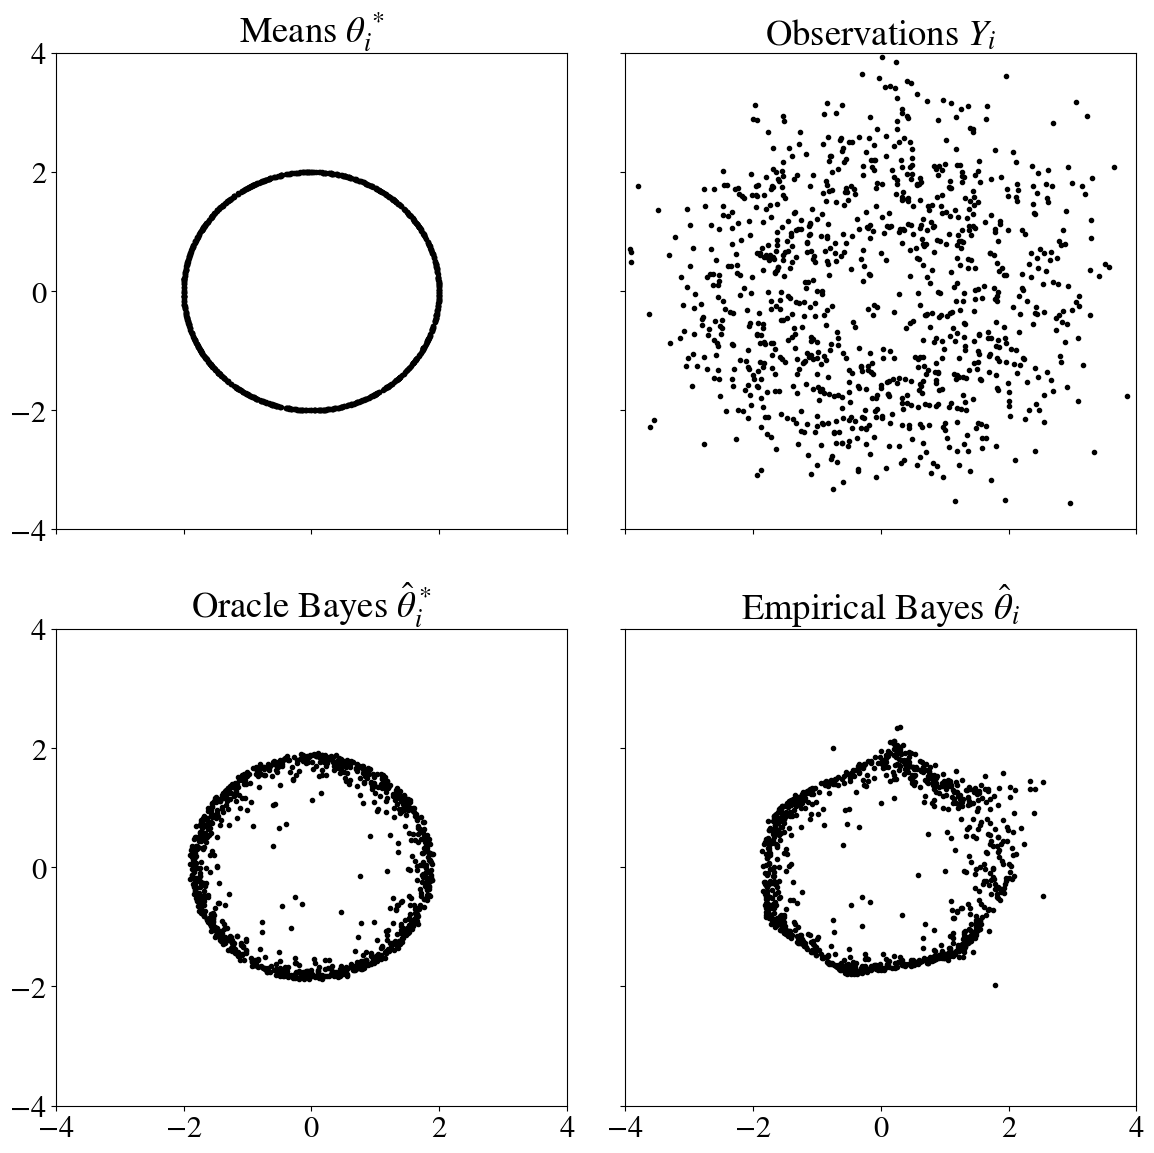

In [13]:
plt.rcParams.update({'font.size': 22,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,12))

ax[0,0].plot(truth[:,0], truth[:,1], 'k.')
ax[0,1].plot(X[:,0], X[:,1], 'k.')
ax[1,0].plot(obayes[:,0], obayes[:,1], 'k.')
ax[1,1].plot(gmleb[:,0], gmleb[:,1], 'k.')

M = 4
plt.xlim([-M, M])
plt.ylim([-M, M])

ax[0,0].set_title('Means $\\theta^*_i$')
ax[0,1].set_title('Observations $Y_i$')
ax[1,0].set_title('Oracle Bayes $\\hat\\theta^*_i$')
ax[1,1].set_title('Empirical Bayes $\\hat\\theta_i$')

plt.tight_layout()
plt.savefig('circle_demo.png', dpi=200)
plt.show()